In [1]:
import gurobipy as gp
from gurobipy import GRB
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import pickle
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
with open("travel_time.pkl", "rb") as file:
    travel_time = pickle.load(file)
D = np.zeros((26,26,26))
c_matrix= travel_time.copy()
for i in range(26):
    for j in range(26):
        for k in range(26):
            D[i,j,k] = min(c_matrix[i][k]+c_matrix[k][i],c_matrix[j][k]+c_matrix[k][j],c_matrix[j][k]+c_matrix[k][i]-c_matrix[j][i],c_matrix[i][k]+c_matrix[k][j]-c_matrix[i][j])
            if D[i,j,k]<0:
                D[i,j,k]=0

In [3]:
#dfbase = pd.read_pickle('base.pkl')
#dfbaset = pd.read_pickle('base_4time.pkl')#update
#dfbasetherd = pd.read_pickle('vars_basecase_time_herd.pkl')
#dfod = pd.read_pickle('base_od.pkl')
#dfodt = pd.read_pickle('base_od_4time.pkl')#update
dfherd = pd.read_pickle('base_4time_empweighted_500lambda.pkl')
#dfrand = pd.read_pickle('vars_basecase_od_time_herd_case60100.pkl')
dfrand = pd.read_pickle('base_od_4time_emp_5lambda.pkl')

districts = {0: 'Antelope Valley', 
             1: 'East Valley', 
             2: 'Glendale', 
             3: 'San Fernando', 
             4: 'West Valley',
             5: 'Alhambra', 
             6: 'El Monte', 
             7: 'Foothill', 
             8: 'Pasadena', 
             9: 'Pomona',
             10: 'Central', 
             11: 'Hollywood-Wilshire', 
             12: 'Northeast', 
             13: 'West',
             14: 'Compton', 
             15: 'South', 
             16: 'Southeast', 
             17: 'Southwest',
             18: 'Bellflower', 
             19: 'East Los Angeles', 
             20: 'San Antonio', 
             21: 'Whittier',
             22: 'Harbor', 
             23: 'Inglewood', 
             24: 'Long Beach', 
             25: 'Torrance'}


In [4]:
#dfxbase = dfbase[dfbase.name=='x']
#dfybase = dfbase[dfbase.name=='y']
#dfzbase = dfbase[dfbase.name=='z']
#dfxbaset = dfbaset[dfbaset.name=='x']
#dfybaset = dfbaset[dfbaset.name=='y']
#dfzbaset = dfbaset[dfbaset.name=='z']
#dfxbasetherd = dfbasetherd[dfbasetherd.name=='x']
#dfybasetherd = dfbasetherd[dfbasetherd.name=='y']
#dfzbasetherd = dfbasetherd[dfbasetherd.name=='z']
#dfxod = dfod[dfod.name=='x']
#dfyod = dfod[dfod.name=='y']
#dfzod = dfod[dfod.name=='z']
#dfxodt = dfodt[dfodt.name=='x']
#dfyodt = dfodt[dfodt.name=='y']
#dfzodt = dfodt[dfodt.name=='z']
dfxherd = dfherd[dfherd.name=='x']
dfyherd = dfherd[dfherd.name=='y']
dfzherd = dfherd[dfherd.name=='z']
dfxrand = dfrand[dfrand.name=='x']
dfyrand = dfrand[dfrand.name=='y']
dfzrand = dfrand[dfrand.name=='z']

In [5]:
total_pop = [420697,443569,344450,526877,899111,339399,419797,308499,140361,547523,354750,479505,287613,666399,278815,193899,166374,379199,356465,195082,407864,321720,201739,411617,469439,465691]


In [6]:
Herd500_herd = np.zeros((6,26))
for tt in range(6):
    for ii in range(26):
        newy = dfyherd[dfyherd.t==tt]
        newy = newy[newy.i==ii]
        newz = dfzherd[dfzherd.t==tt]
        newz = newz[newz.i==ii]
        Herd500_herd[tt,ii] = (sum(newy.value)+sum(newz.value))/total_pop[ii]
Herd10000_herd = np.zeros((6,26))
for tt in range(6):
    for ii in range(26):
        newy = dfyrand[dfyrand.t==tt]
        newy = newy[newy.i==ii]
        newz = dfzrand[dfzrand.t==tt]
        newz = newz[newz.i==ii]
        Herd10000_herd[tt,ii] = (sum(newy.value)+sum(newz.value))/total_pop[ii]
            


In [7]:
Herd10000_herd

array([[5.53961640e-02, 2.14352220e-02, 2.28770504e-03, 6.72997683e-01,
        4.34970766e-01, 2.04950515e-02, 5.92853212e-01, 1.15679467e-01,
        6.57305092e-02, 4.70336406e-02, 1.07963354e-03, 7.90817614e-01,
        3.36980595e-02, 6.13242217e-01, 1.24634614e-02, 0.00000000e+00,
        3.13871158e-02, 2.57120931e-03, 1.41292974e-01, 3.25914231e-01,
        8.45436224e-01, 4.66554768e-02, 7.08836665e-03, 1.74652650e-02,
        8.30778866e-03, 6.78561535e-04],
       [7.15006287e-01, 6.85455927e-01, 1.62961243e-01, 5.90384473e-02,
        4.45365478e-01, 6.14026559e-03, 1.11594413e-01, 1.86678077e-01,
        4.06808159e-03, 3.91589029e-01, 2.13716702e-01, 3.53698084e-03,
        3.73070758e-03, 2.68787918e-02, 1.50282445e-01, 3.43116777e-02,
        0.00000000e+00, 1.44567892e-02, 2.86715386e-01, 1.71251064e-01,
        3.68260008e-03, 2.48405446e-01, 5.43771903e-03, 3.55670441e-02,
        4.74221358e-01, 8.16133445e-01],
       [1.77921402e-01, 1.72663103e-01, 3.11969807e-01

In [8]:
for t in range(1,6):
    Herd500_herd[t] += Herd500_herd[t-1]
    Herd10000_herd[t] += Herd10000_herd[t-1]

In [9]:
#print('lambda = 500')
#print(Herd500_herd)
#print('lambda = 10000')
#print(Herd10000_herd)
#print('diff')
#print(Herd10000_herd-Herd500_herd)
emp=[0.9785489423063246,
0.9749523393023726,
0.9810134958440276,
0.9715990029226316,
0.9512510687291531,
0.9793683522808072,
0.9739319327227332,
0.9817156078851325,
0.9915252477779021,
0.9678482424468472,
0.9760508448195166,
0.9657752125951641,
0.9784091897580796,
0.967984322913777,
0.9795198849727248,
0.9859672856449567,
0.9874863827092342,
0.9723956829474802,
0.9745472149882571,
0.985468457303294,
0.9697058020586842,
0.9771345654416476,
0.9898114604005365,
0.979337971566636,
0.9766137484373549,
0.9772144560727959]

In [10]:
HL = np.array(emp)*np.array(total_pop)

In [11]:
xx = Herd10000_herd-Herd500_herd
for t in range(6):
    print('time,',t)
    for x in range(26):
        if xx[t,x]<0.0001:
            print('Delayed',districts[x],'Herd obj',HL[x])
        elif xx[t,x]>0.0001:
            print('Prioritized',districts[x],'Herd obj',HL[x])
        

time, 0
Prioritized Antelope Valley Herd obj 411672.6043814438
Delayed East Valley Herd obj 432458.6341920141
Prioritized Glendale Herd obj 337910.0986434753
Prioritized San Fernando Herd obj 511913.16786286735
Delayed West Valley Herd obj 855280.2996561376
Prioritized Alhambra Herd obj 332396.6393957537
Prioritized El Monte Herd obj 408853.7035612052
Delayed Foothill Herd obj 302858.2833169555
Prioritized Pasadena Herd obj 139171.47530335412
Delayed Pomona Herd obj 529919.1732492251
Prioritized Central Herd obj 346254.03719972353
Prioritized Hollywood-Wilshire Herd obj 463094.04331544414
Delayed Northeast Herd obj 281403.2022938905
Prioritized West Herd obj 645063.7848054181
Prioritized Compton Herd obj 273104.8367286703
Delayed South Herd obj 191178.07071927146
Prioritized Southeast Herd obj 164292.0594368661
Prioritized Southwest Herd obj 368731.4705780016
Prioritized Bellflower Herd obj 347391.9729907891
Prioritized East Los Angeles Herd obj 192247.1575876412
Prioritized San Antoni

In [12]:
score = 0
for t in range(6):
    for i in range(26):
        for j in range(26):
            y_v = dfrand[dfrand.i==i]
            y_v = y_v[y_v.j==j]
            y_v = y_v[y_v.t==t]
            y_v = y_v.value.values[0]
            score += y_v*(2*travel_time[i][j])
            for k in range(26):
                z_v = dfzrand[dfzrand.i==i]
                z_v = z_v[z_v.j==j]
                z_v = z_v[z_v.k==k]
                z_v = z_v[z_v.t==t]
                z_v = z_v.value.values[0]
                score += z_v*D[i][j][k]

In [13]:
score


197478616.52999988

# Base model + OD + 6 periods + 60% herd imunity

In [14]:
flow_matrix = np.zeros((26,26,6))
flow_matrix_od = np.zeros((26,26,26,6))
for t in range(6):
    for i in range(26):
        for j in range(26):
            new = dfyrand[dfyrand['i']==i]
            new = new[new['j']==j]
            new = new[new['t']==t]
            flow_matrix[i,j,t] = sum(new.value)
            for k in range(26):
                new2 = dfzrand[dfzrand['i']==i]
                new2 = new2[new2['j']==j]
                new2 = new2[new2['k']==k]
                new2 = new2[new2['t']==t]
                flow_matrix_od[i,j,k,t] = sum(new2.value)
sites = list(dfxrand[dfxrand.value==1].i)

indices = np.arange(len(districts))
index_names = [districts[i] for i in indices]
categories = []
values = np.zeros((5,6))
sites_map = {}
count = 0
for site in sites:
    print(districts[site])
    sites_map[site]=count
    count+=1
    categories.append(districts[site])
    #print(np.sum(flow_matrix[:,site,:])+np.sum(flow_matrix_od[:,:,site,:]))
    #values.append(np.sum(flow_matrix[:,site,:])+np.sum(flow_matrix_od[:,:,site,:]))
print('more smooth')

San Fernando
West Valley
El Monte
Central
Bellflower
Inglewood
more smooth


In [15]:
#print(np.where(flow_matrix[0]>0)[0][0])
first = 0
second = 0
third = 0
fourth = 0
fifth = 0
for site in list(districts.keys()):
    candiates = travel_time[site,:].copy()
    for vac_site in sites:
        candiates[vac_site] -= 1000
    sorted_indices = np.argsort(candiates)
    index1 = sorted_indices[0]
    index2 = sorted_indices[1]
    index3 = sorted_indices[2]
    index4 = sorted_indices[4]
    index5 = sorted_indices[5]
    percentage = 100*np.sum(flow_matrix[site,index1,:])/np.sum(flow_matrix[site])
    values[0,sites_map[index1]] += np.sum(flow_matrix[site,index1,:])
    values[1,sites_map[index2]] += np.sum(flow_matrix[site,index2,:])
    values[2,sites_map[index3]] += np.sum(flow_matrix[site,index3,:])
    values[3,sites_map[index4]] += np.sum(flow_matrix[site,index4,:])
    values[4,sites_map[index5]] += np.sum(flow_matrix[site,index5,:])
    percentage2 = 100*np.sum(flow_matrix[site,index2,:])/np.sum(flow_matrix[site])
    percentage3 = 100*np.sum(flow_matrix[site,index3,:])/np.sum(flow_matrix[site])
    first += np.sum(flow_matrix[site,index1,:])
    second += np.sum(flow_matrix[site,index2,:])
    third += np.sum(flow_matrix[site,index3,:])
    fourth += np.sum(flow_matrix[site,index4,:])
    fifth += np.sum(flow_matrix[site,index5,:])
    if percentage>100:
        print(districts[site])
        print(site)
        #print('preferred',districts[np.argmin(travel_time[site,:])])
        #print('actual',districts[np.where(flow_matrix[site]>0)[0][0]])
        print(percentage,'% go to closest vaccination site')
        print(percentage2,'% go to second closest vaccination site')
        print(percentage3,'% go to third closest vaccination site')


In [16]:
with open("travel_time.pkl", "rb") as file:
    c_m_v = pickle.load(file)

In [17]:
first_od = 0
second_od = 0
third_od = 0
fourth_od = 0
fifth_od = 0
first_odo = 0
second_odo = 0
third_odo = 0
fourth_odo = 0
fifth_odo = 0
first_odd = 0
second_odd = 0
third_odd = 0
fourth_odd = 0
fifth_odd = 0
for site in list(districts.keys()):
    for site2 in list(districts.keys()):
        candiates2 = D[site,site2,:].copy()
        candiates2[site] = -1
        for vac_site in sites:
            candiates2[vac_site] -= 1000
        sorted_indices = np.argsort(candiates2)
        index1 = sorted_indices[0]
        index2 = sorted_indices[1]
        index3 = sorted_indices[2]
        index4 = sorted_indices[3]
        index5 = sorted_indices[4]
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route = 100*(np.sum(flow_matrix_od[site,site2,index1]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route = 100
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route2 = 100*(np.sum(flow_matrix_od[site,site2,index2]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route2 = 100
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route3 = 100*(np.sum(flow_matrix_od[site,site2,index3]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route3 = 100  
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route4 = 100*(np.sum(flow_matrix_od[site,site2,index4]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route4 = 100 
        if np.sum(flow_matrix_od[site,site2])>0:
            percentage_route5 = 100*(np.sum(flow_matrix_od[site,site2,index5]))/np.sum(flow_matrix_od[site,site2])
        else:
            percentage_route5 = 100 
        first_od += np.sum(flow_matrix_od[site,site2,index1])
        if c_m_v[site,index1]<c_m_v[site2,index1]:
            first_odo += np.sum(flow_matrix_od[site,site2,index1])
        else:
            first_odd += np.sum(flow_matrix_od[site,site2,index1])
        if index2 == site2:
            values[0,sites_map[index1]] += np.sum(flow_matrix_od[site,site2,index1])
            values[0,sites_map[index2]] += np.sum(flow_matrix_od[site,site2,index2])
            values[1,sites_map[index3]] += np.sum(flow_matrix_od[site,site2,index3])
            values[2,sites_map[index4]] += np.sum(flow_matrix_od[site,site2,index4])
            values[3,sites_map[index5]] += np.sum(flow_matrix_od[site,site2,index5])
            first_od += np.sum(flow_matrix_od[site,site2,index2])
            if c_m_v[site,index2]<c_m_v[site2,index2]:
                first_odo += np.sum(flow_matrix_od[site,site2,index2])
            else:
                first_odd += np.sum(flow_matrix_od[site,site2,index2])
            second_od += np.sum(flow_matrix_od[site,site2,index3])
            if c_m_v[site,index2]<c_m_v[site2,index3]:
                second_odo += np.sum(flow_matrix_od[site,site2,index3])
            else:
                second_odd += np.sum(flow_matrix_od[site,site2,index3])
            third_od += np.sum(flow_matrix_od[site,site2,index4])
            if c_m_v[site,index3]<c_m_v[site2,index4]:
                third_odo += np.sum(flow_matrix_od[site,site2,index4])
            else:
                third_odd += np.sum(flow_matrix_od[site,site2,index4])
            fourth_od += np.sum(flow_matrix_od[site,site2,index5])
            if c_m_v[site,index4]<c_m_v[site2,index5]:
                fourth_odo += np.sum(flow_matrix_od[site,site2,index5])
            else:
                fourth_odd += np.sum(flow_matrix_od[site,site2,index5])
        else:
            values[0,sites_map[index1]] += np.sum(flow_matrix_od[site,site2,index1])
            values[1,sites_map[index2]] += np.sum(flow_matrix_od[site,site2,index2])
            values[2,sites_map[index3]] += np.sum(flow_matrix_od[site,site2,index3])
            values[3,sites_map[index4]] += np.sum(flow_matrix_od[site,site2,index4])
            values[4,sites_map[index5]] += np.sum(flow_matrix_od[site,site2,index5])
            second_od += np.sum(flow_matrix_od[site,site2,index2])
            if c_m_v[site,index2]<c_m_v[site2,index2]:
                second_odo += np.sum(flow_matrix_od[site,site2,index2])
            else:
                second_odd += np.sum(flow_matrix_od[site,site2,index2])
            third_od += np.sum(flow_matrix_od[site,site2,index3])
            if c_m_v[site,index3]<c_m_v[site2,index3]:
                third_odo += np.sum(flow_matrix_od[site,site2,index3])
            else:
                third_odd += np.sum(flow_matrix_od[site,site2,index3])
            fourth_od += np.sum(flow_matrix_od[site,site2,index4])
            if c_m_v[site,index4]<c_m_v[site2,index4]:
                fourth_odo += np.sum(flow_matrix_od[site,site2,index4])
            else:
                fourth_odd += np.sum(flow_matrix_od[site,site2,index4])
            fifth_od += np.sum(flow_matrix_od[site,site2,index5])
            if c_m_v[site,index5]<c_m_v[site2,index5]:
                fifth_odo += np.sum(flow_matrix_od[site,site2,index5])
            else:
                fifth_odd += np.sum(flow_matrix_od[site,site2,index5])
        if percentage_route>100:
            print('OD pair '+districts[site]+' to '+districts[site2])
            if percentage_route>0:
                print(percentage_route,'% go to closest vaccination site')
            if percentage_route2>0:
                print(percentage_route2,'% go to second closest vaccination site')
            if percentage_route3>0:
                print(percentage_route3,'% go to third closest vaccination site')
            if percentage_route4>0:
                print(percentage_route4,'% go to fourth closest vaccination site')
            if percentage_route5>0:
                print(percentage_route5,'% go to fourth closest vaccination site')

In [18]:
#print('Overall,\n\n for non-communters,\n',100*first/np.sum(flow_matrix),'% people go to closest vaccine site;\n',100*second/np.sum(flow_matrix),'% people go to second closest vaccine site;\n',100*third/np.sum(flow_matrix),'% people go to third closest vaccine site;\n')
#print('for communters,\n',100*first_od/np.sum(flow_matrix_od),'% people go to closest vaccine site;\n',100*second_od/np.sum(flow_matrix_od),'% people go to second closest vaccine site;\n',100*third_od/np.sum(flow_matrix_od),'% people go to third closest vaccine site;\n',100*fifth_od/np.sum(flow_matrix_od),'% people go to fifth closest vaccine site;\n')
print(100*(first+first_odo)/sum(total_pop),'% people go to closest vaccine site;')
print(100*(first_odd)/sum(total_pop),'% people go to closest (D) vaccine site;\n')
print(100*(second+second_odo)/sum(total_pop),'% people go to 2nd closest vaccine site;')
print(100*(second_odd)/sum(total_pop),'% people go to 2nd closest (D) vaccine site;\n')
print(100*(third+third_odo)/sum(total_pop),'% people go to 3rd closest vaccine site;')
print(100*(third_odd)/sum(total_pop),'% people go to 3rd closest (D) vaccine site;\n')
print(100*(fourth+fourth_odo)/sum(total_pop),'% people go to 4th closest vaccine site;')
print(100*(fourth_odd)/sum(total_pop),'% people go to 4th closest (D) vaccine site;\n')
print(100*(fifth+fifth_odo)/sum(total_pop),'% people go to 5th closest vaccine site;')
print(100*(fifth_odd)/sum(total_pop),'% people go to 5th closest (D) vaccine site;\n')
(first+first_odo+first_odd)/sum(total_pop)

76.984036430028 % people go to closest vaccine site;
21.74580365102159 % people go to closest (D) vaccine site;

0.3735717532838629 % people go to 2nd closest vaccine site;
0.8811290611815503 % people go to 2nd closest (D) vaccine site;

0.008537415122036165 % people go to 3rd closest vaccine site;
0.006921689362959228 % people go to 3rd closest (D) vaccine site;

0.0 % people go to 4th closest vaccine site;
0.0 % people go to 4th closest (D) vaccine site;

0.0 % people go to 5th closest vaccine site;
0.0 % people go to 5th closest (D) vaccine site;



0.9872984008104959

In [26]:
sum(values[0])/np.sum(values)

0.9872984008104959

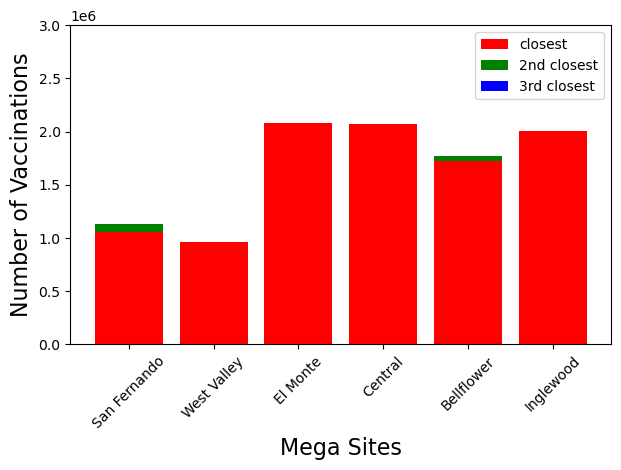

In [20]:
## plt.figure(figsize=(8, 6), dpi=300)  # Set figure size and DPI for high resolution


plt.bar(categories, values[0], color='red')
plt.bar(categories, values[1], bottom=values[0], color='green')
plt.bar(categories, values[2], bottom=values[1]+values[0], color='blue')


plt.xlabel('Mega Sites',fontsize=16)
plt.ylabel('Number of Vaccinations',fontsize=16)
#plt.title('Bar Plot Example')

plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.ylim(-1, 3000000)
plt.legend(['closest', '2nd closest', '3rd closest'])
plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')  # Save as a high-resolution image


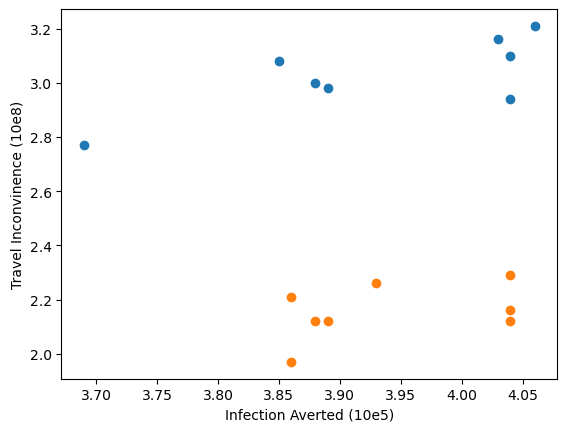

In [21]:
ia = np.array([3.69,3.86,4.03,3.93,4.06,4.04,4.04,4.04,3.89,3.88,4.04,4.04,3.88,3.89,3.85,3.86])
ti = np.array([2.77,1.97,3.16,2.26,3.21,2.29,2.94,2.12,2.98,2.12,3.1,2.16,3,2.12,3.08,2.21])
import matplotlib.pyplot as plt
ia1 = [ia[i] for i in range(0,len(ia),2)]
ia2 = [ia[i] for i in range(1,len(ia),2)]
ti1 = [ti[i] for i in range(0,len(ti),2)]
ti2 = [ti[i] for i in range(1,len(ti),2)]

plt.scatter(ia1, ti1)
plt.scatter(ia2, ti2)
plt.xlabel("Infection Averted (10e5)")
plt.ylabel("Travel Inconvinence (10e8)")
plt.show()

In [22]:
for i in range(0,len(ia),2):
    print(i)

0
2
4
6
8
10
12
14


In [23]:
((2.85-2.24)*10**8)/sum(total_pop)

6.083905636030444

In [24]:
((2.85-2.24)*(10**8))

60999999.999999985